<a href="https://colab.research.google.com/github/ashishrag9899/ashishrag9899/blob/main/Auto_Encoders%20_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Loading and Preparation

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/ecg.csv'  # Replace with your dataset path
ecg_data = pd.read_csv(file_path)

# Separating features and labels
features = ecg_data.iloc[:, :-1]  # All columns except the last
labels = ecg_data.iloc[:, -1]     # Last column as labels

# Standardizing the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Creating a standardized DataFrame
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)
standardized_df['Label'] = labels.values

# Filtering normal rhythmic data
normal_data = standardized_df[standardized_df['Label'] == 1.0].drop(columns=['Label'])

# Splitting data into training and validation sets
train_data, val_data = train_test_split(normal_data, test_size=0.2, random_state=42)


EDA and Statistics


,Shape,Null Values
0,4997,0
1,141,0


,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,-0.262532,-1.649593,-2.492366,-3.119508,-3.167414,-2.866184,-2.272863,-1.797750,-1.409816,-0.935898,...,0.071168,-0.062821,-0.276300,-0.507968,-0.761527,-0.835386,-0.642892,-0.487950,-0.706754,0.583950
std,1.152563,1.445591,1.386477,1.302936,1.104513,0.906362,0.731666,0.622856,0.636923,0.657822,...,1.404529,1.646210,1.894644,2.059515,2.086289,2.056447,1.859564,1.831162,1.414498,0.492951
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004439,-2.701395,-3.667851,-4.227203,-4.007389,-3.480760,-2.779853,-2.165844,-1.773994,-1.362007,...,-1.088029,-1.588688,-2.147271,-2.731039,-3.031581,-2.868739,-2.155084,-1.658548,-1.596867,0.000000
50%,-0.297583,-1.661891,-2.585872,-3.388020,-3.468898,-2.946908,-2.285430,-1.750063,-1.422461,-0.910449,...,0.658234,0.717676,0.604723,0.333481,-0.030771,-0.202761,-0.194480,-0.160768,-0.568775,1.000000
75%,0.500057,-0.677702,-1.514058,-2.235425,-2.531019,-2.398789,-1.823473,-1.483699,-1.063533,-0.476386,...,1.169415,1.238671,1.264441,1.234413,1.034046,0.945220,0.951666,1.002628,0.271822,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


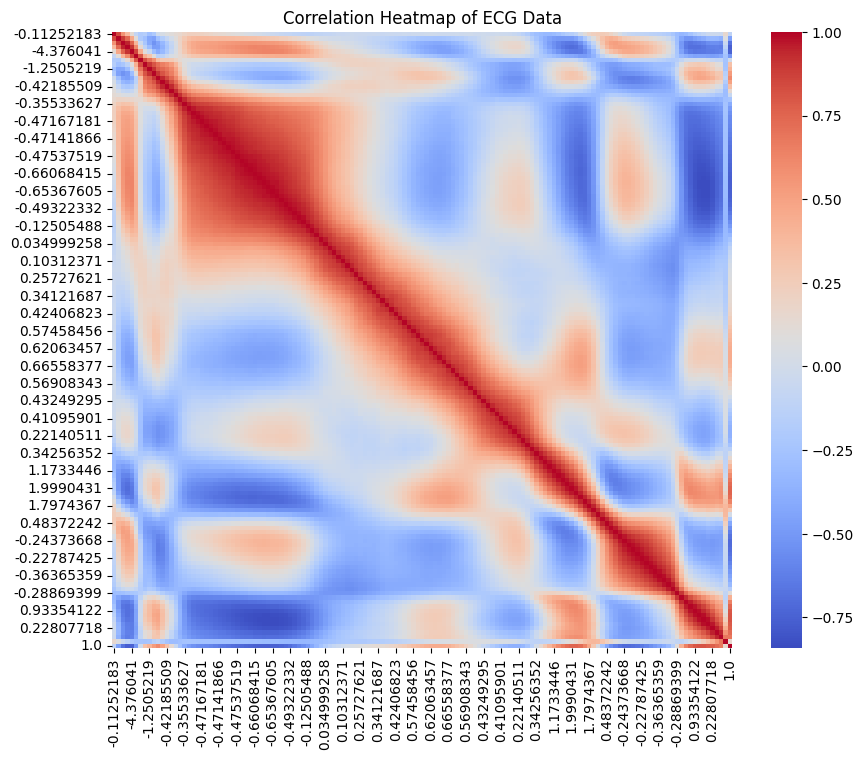

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Basic dataset statistics
eda_stats = ecg_data.describe()

# Checking for null values
null_values = ecg_data.isnull().sum()

# Summary
eda_summary = {
    "Shape": ecg_data.shape,
    "Null Values": null_values.sum()
    # Remove 'Sample Statistics': eda_stats
}

# Correlation matrix for visualization
correlation_matrix = ecg_data.corr()

# Displaying statistics using pandas (alternative to ace_tools)
display(pd.DataFrame(eda_summary))
display(eda_stats)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of ECG Data")
plt.show()

Build the Autoencoder

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Defining the updated autoencoder model
input_dim = train_data.shape[1]

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu')
])

# Decoder
decoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(32,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Full Autoencoder
autoencoder = models.Sequential([encoder, decoder])

# Compile the autoencoder with a learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

# Display model summary
autoencoder.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 32)                  │          28,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 140)                 │          28,492 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,876 (222.17 KB)

 Trainable params: 56,876 (222.17 KB)

 Non-trainable params: 0 (0.00 B)

Train the Autoencoder

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 1.2397 - val_loss: 0.8432
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8527 - val_loss: 0.7277
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7427 - val_loss: 0.6560
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7029 - val_loss: 0.6041
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6445 - val_loss: 0.5865
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6400 - val_loss: 0.5753
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6335 - val_loss: 0.5680
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6128 - val_loss: 0.5646
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5843 - val_loss: 0.5620
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5855 - val_loss: 0.5583
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5910 - val_loss: 0.5560
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

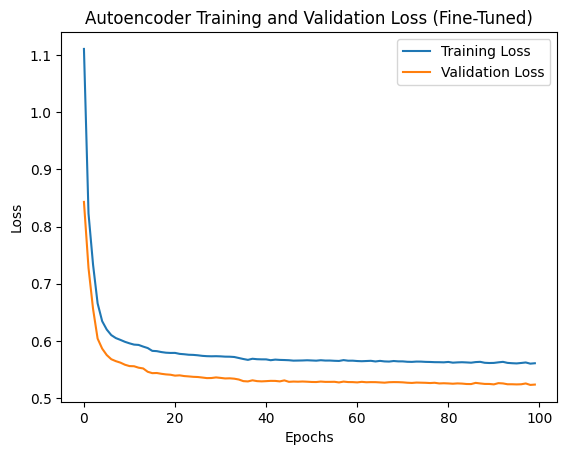

In [20]:
# Train the autoencoder
history = autoencoder.fit(
    train_data,
    train_data,
    epochs=100,  # Increased epochs
    batch_size=64,  # Larger batch size
    validation_data=(val_data, val_data),
    verbose=1
)

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Autoencoder Training and Validation Loss (Fine-Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Evaluate with Precision-Recall and Optimal Threshold

In [21]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score

# Prepare feature-only data
features_only = standardized_df.iloc[:, :-1]
true_labels = 1 - standardized_df['Label'].values  # Flip labels for anomaly detection

# Predict reconstruction
reconstructed = autoencoder.predict(features_only)

# Calculate reconstruction errors
reconstruction_errors = np.mean((reconstructed - features_only)**2, axis=1)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_labels, reconstruction_errors)

# Calculate F1-Score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]

print(f"New Optimal Threshold: {optimal_threshold}")
print(f"Best F1-Score After Fine-Tuning: {f1_scores.max()}")

# Reclassify anomalies using the new threshold
optimal_predicted_labels = (reconstruction_errors > optimal_threshold).astype(int)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
New Optimal Threshold: 0.3503871704173334
Best F1-Score After Fine-Tuning: 0.7273402674591382


Final Evaluation Metrics

Confusion Matrix with Fine-Tuned Model:
[[1571 1347]
 [ 122 1957]]

Classification Report with Fine-Tuned Model:
              precision    recall  f1-score   support

      Normal       0.93      0.54      0.68      2918
    Abnormal       0.59      0.94      0.73      2079

    accuracy                           0.71      4997
   macro avg       0.76      0.74      0.70      4997
weighted avg       0.79      0.71      0.70      4997

Accuracy with Fine-Tuned Model: 0.71


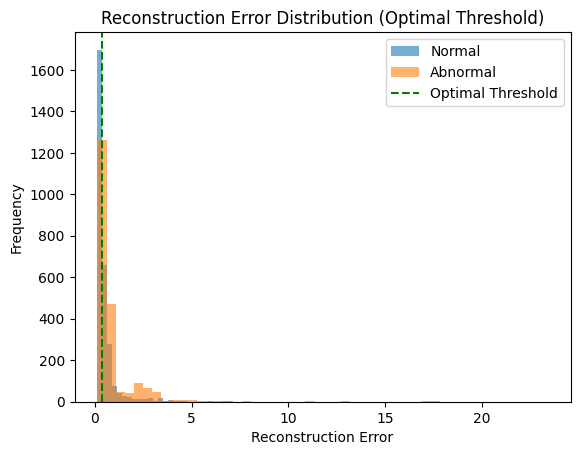

In [22]:
# Confusion Matrix and Metrics
conf_matrix_opt = confusion_matrix(true_labels, optimal_predicted_labels)
accuracy_opt = accuracy_score(true_labels, optimal_predicted_labels)
report_opt = classification_report(true_labels, optimal_predicted_labels, target_names=["Normal", "Abnormal"])

# Display results
print("Confusion Matrix with Fine-Tuned Model:")
print(conf_matrix_opt)
print("\nClassification Report with Fine-Tuned Model:")
print(report_opt)
print(f"Accuracy with Fine-Tuned Model: {accuracy_opt:.2f}")

# Visualize reconstruction error distributions
normal_errors = reconstruction_errors[true_labels == 0]
abnormal_errors = reconstruction_errors[true_labels == 1]

plt.hist(normal_errors, bins=50, alpha=0.6, label='Normal')
plt.hist(abnormal_errors, bins=50, alpha=0.6, label='Abnormal')
plt.axvline(optimal_threshold, color='green', linestyle='--', label='Optimal Threshold')
plt.legend()
plt.title('Reconstruction Error Distribution (Optimal Threshold)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()
